# **MNIST Digits Dataset**

## *Information*
This dataset has been used to train a deep neural network, which has ben exported to an H5 file for offline use on a local computer. The network was trained in the cloud using the below code.

## Imports

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Data

In [ ]:
data = keras.datasets.mnist
(trainX, trainy), (testX, testy) = data.load_data()
print(trainX.shape)
print(trainX[0].shape)

(60000, 28, 28)
(28, 28)


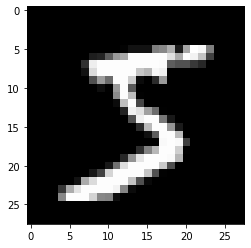

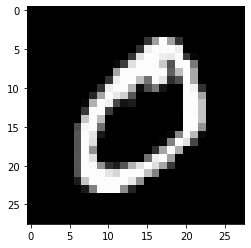

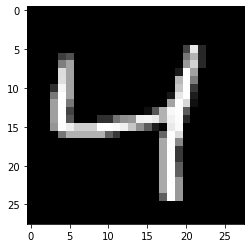

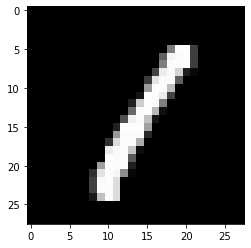

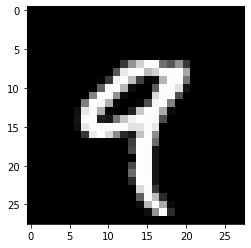

In [ ]:
for i in range(5):
  img = trainX[i]
  plt.imshow(img, cmap=plt.cm.gray)
  plt.show()

## Data Normalisation

In [ ]:
trainX = trainX / 255.0
testX = testX / 255.0

for image in trainX:
  for row in image:
    for col in row:
      if col > 0.6:
        col = 0.9
      else:
        col = 0

for image in testX:
  for row in image:
    for col in row:
      if col > 0.6:
        col = 0.9
      else:
        col = 0

##Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(56, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(trainX, trainy, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4162 - accuracy: 0.8755
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1085 - accuracy: 0.9672
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0746 - accuracy: 0.9765
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9829
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9875
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0334 - accuracy: 0.9886
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0245 - accuracy: 0.9921


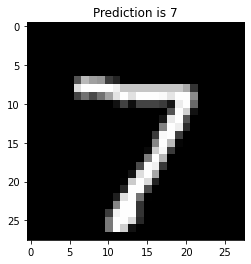

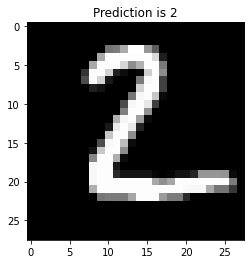

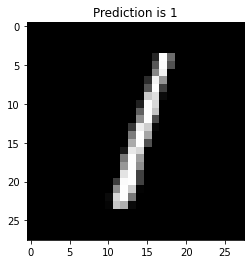

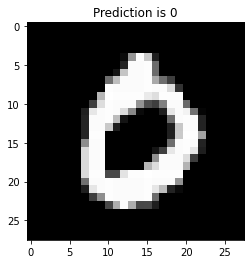

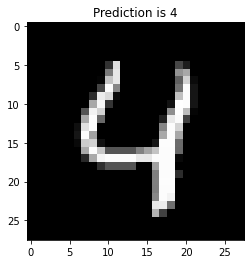

In [ ]:
prediction = model.predict(testX)
for i in range(5):
  plt.imshow(testX[i], cmap=plt.cm.gray)
  plt.title(f'Prediction is {np.argmax(prediction[i])}')
  plt.show()

## Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(testX, testy)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9759
0.9758999943733215


## Exporting to H5 file

In [ ]:
model.save('nn.h5')
testX[0][7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32941176, 0.7254902 , 0.62352941, 0.59215686,
       0.23529412, 0.14117647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])